### Bond value

#### Constant simple rate

**Question**

A 2-year bond has a $4\%$ coupon rate.

The `simple rate` is constant $3\%$.

What is the current Fair Value of the bond ?

**Answer**

Conventions: notional is 100, coupon payment is semi-annual.

Sum of the PVs of all future cash flows: 

$$\frac{2}{1+\frac{1}{2}\cdot 0.03}+\frac{2}{1+0.03}+\frac{2}{1+\frac{3}{2}\cdot 0.03}+\frac{102}{1+2\cdot 0.03}$$

In [1]:
pv = 2 / (1 + 0.5 * 0.03) + 2 / (1 + 0.03) + 2 / (1 + 1.5 * 0.03) + 102 / (1 + 2 * 0.03)
print(f'{pv:.3f}')

102.052


**Bootstrapping calculation.** A two-year bond with 5% coupon starts now and currently trades at 100. For 6m, 1y and 18m the simple rate is 2%, 3% and 4%. Calculate the 2y point of the yield curve.  Help: remember the quote coventions and the multiplication of the rate with the time length.

$$100=\frac{2.5}{1+\frac{1}{2}\cdot 0.02}+\frac{2.5}{1+0.03}+\frac{2.5}{1+\frac{3}{2}\cdot 0.04}+\frac{102.5}{1+2\cdot L\left(2\right)}$$

$$L\left(2\right)=\frac{1}{2} \cdot \left( \frac{102.5}{100-\left(\frac{2.5}{1+\frac{1}{2}\cdot 0.02}+\frac{2.5}{1+0.03}+\frac{2.5}{1+\frac{3}{2}\cdot 0.04}\right) }-1\right)$$

In [2]:
pv = 0.5 * (102.5 / (100 - 2.5 * (1.0/1.01 + 1/1.015 + 1/1.02))- 1) 
print(f'L(2)={100*pv:.2f}%')

L(2)=5.34%


**Definiton** Define the binomial tree model for derivative pricing.

The binomial tree model calculates the current fair value of a derivative product by modeling the price movements of the derivative products's underlying asset as a Brownian (discretized Wiener) motion. Within the model possible prices of the underlying asset are listed, together with the probabilities of these prices. These prices at maturity are discounted back to the current time point and weighted with the probabilities to calculate the current fair value.


#### Constant zero coupon rate

**Question**

A 2-year bond has a $4\%$ coupon rate.

The `zero coupon rate` is constant $3\%$.

What is the current Fair Value of the bond ?

**Answer**

Sum of the PVs of all future cash flows: 

$$
\frac{2}{1+\frac{0.03}{2}} 
\, + \,
\frac{2}{\left(1+\frac{0.03}{2}\right)^{2}}
\, + \,
\frac{2}{\left(1+\frac{0.03}{2}\right)^{3}}
\, + \,
\frac{102}{\left(1+\frac{0.03}{2}\right)^{4}}
$$



In [3]:
pv = 2 / (1 + 0.5 * 0.03) + 2 / (1 + 0.5 * 0.03) ** 2 + 2 / (1 + 0.5 * 0.03) ** 3 + 102 / (1 + 0.5 * 0.03) ** 4
print(f'{pv:.3f}')

101.927


#### Simple rate or zero coupon rate

**Question**

A 2-year bond has a $6\%$ coupon rate.

(a) The simple rate is 6M: $5\%$, 1Y: $5.5\%$, 18M: $5.8\%$, 2Y: $6.1\%$.

(b) The above numbers are the values of the zero rate.

What is the current Fair Value of the bond ?

**Answer**

Sum of the PVs of all future cash flows

(a) with the `simple rate` :
$\,\,\,\,\displaystyle{\frac{3}{1+\frac{1}{2}\cdot 0.05}+\frac{3}{1+0.055}+\frac{3}{1+\frac{3}{2}\cdot 0.058}+\frac{103}{1+2\cdot 0.061}}$

(b) with the `zero coupon rate` :
$\,\,\,\,
\displaystyle{\frac{3}{1+\frac{1}{2}\cdot 0.05}
+
\frac{3}{\left(1+\frac{1}{2}\cdot 0.055\right)^2}
+
\frac{3}{\left(1+\frac{1}{2}\cdot 0.058\right)^3}
+
\frac{103}{\left(1+\frac{1}{2}\cdot 0.061\right)^4}}$



In [4]:
from numbers import Number

NOTIONAL = 100
PRECISION_DIGITS = 3
RATES = {'6m': 0.05, '1y': 0.055, '18m': 0.058, '2y': 0.061}


def two_year_bond_PV(yearly_coupon_percent=None, rate=None, rate_type='zero coupon rate'):
    """
    Calculation of the sum of the PVs of future cash flows received by the holder of the bond
    Discounting can be provided either by the simple rate or the zero coupon rate
    Coupon payment is semi-annual
    """
    assert isinstance(yearly_coupon_percent, Number), 'Please provide a number for "yearly_coupon_percent"'
    assert isinstance(rate, dict), '"rate" should be a dict'
    for t in ['6m', '1y', '18m', '2y']:
        assert t in rate, f'"rate" must provide a value for time={t}'

    coupon_frequency = 2  # twice per year
    coupon = NOTIONAL * yearly_coupon_percent / 100.0 / coupon_frequency

    if rate_type == 'simple rate':
        value = (coupon /              (1 + 0.5 * rate['6m'] ) +
                 coupon /              (1 + 1.0 * rate['1y'] ) +
                 coupon /              (1 + 1.5 * rate['18m']) +
                 (NOTIONAL + coupon) / (1 + 2.0 * rate['2y'] )
                )
    elif rate_type == 'zero coupon rate':
        value = (coupon /              (1 + 0.5 * rate['6m'] ) +
                 coupon /              (1 + 0.5 * rate['1y'] ) ** 2.0 +
                 coupon /              (1 + 0.5 * rate['18m']) ** 3.0 +
                 (NOTIONAL + coupon) / (1 + 0.5 * rate['2y'] ) ** 4.0
                )
    else:
        raise ValueError(f'This rate_type is not available: {rate_type}')

    return value


price = two_year_bond_PV(yearly_coupon_percent=6, rate=RATES, rate_type='simple rate')
print(f'Bond PV using the **simple** rate: {price:.{PRECISION_DIGITS}f}')

price = two_year_bond_PV(yearly_coupon_percent=6, rate=RATES)
print(f'Bond PV using the **zero coupon** rate: {price:.{PRECISION_DIGITS}f}')

Bond PV using the **simple** rate: 100.331
Bond PV using the **zero coupon** rate: 99.859


### Bond yield (also called: Yield to maturity)

The constant zero coupon rate that makes the sum of the PVs of future cash flows equal the current market price. 

Note that a bond yield means applying the same rate for discounting the cash flows from all future time points to the present.

**Question**

How does the bond's price change if its yield grows ?

**Answer**

  1. Read again the above definition: the yield is a value we can select for the zero coupon rate.
  2. So a rising yield means that the same future incomes will have a stronger discounting to obtain the bond's PV.
  3. Thus, as a bond's yield grows its PV will drop.

In summary, `bond yield and price change with opposite sign`.

In [5]:
from scipy.optimize import root_scalar

CURRENT_MARKET_VALUE = 98.03
YEARLY_COUPON_PERCENT = 6


def two_year_bond_PV_vs_bond_yield(bond_yield, yearly_coupon_percent=YEARLY_COUPON_PERCENT):
    yield_curve_with_zero_coupon_rate = {'6m': bond_yield, '1y': bond_yield, '18m': bond_yield, '2y': bond_yield}
    return two_year_bond_PV(yearly_coupon_percent=yearly_coupon_percent, rate=yield_curve_with_zero_coupon_rate)


def difference_of_calculated_PV_from_market_value(bond_yield, current_market_value=CURRENT_MARKET_VALUE):
    return two_year_bond_PV_vs_bond_yield(bond_yield) - current_market_value


bond_yield = root_scalar(difference_of_calculated_PV_from_market_value, bracket=[0,1]).root

print(f'Bond yield is {100 * bond_yield:.2f}%')

Bond yield is 7.07%


### Par yield
Par value means face value of the bond.

The par yield is the yield that makes the calculated PV equal to the par value.

In [6]:
PAR_VALUE = NOTIONAL


def difference_of_calculated_PV_from_par_value(bond_yield, par_value=PAR_VALUE):
    return two_year_bond_PV_vs_bond_yield(bond_yield) - par_value


par_yield = root_scalar(difference_of_calculated_PV_from_par_value, bracket=[0,1]).root

print(f'The par value is {PAR_VALUE}. The par yield is {100 * par_yield:.2f}%')

The par value is 100. The par yield is 6.00%


### Bond Price vs Bond Yield

Face value is 100. Observe that the bond's par yield is the coupon value.

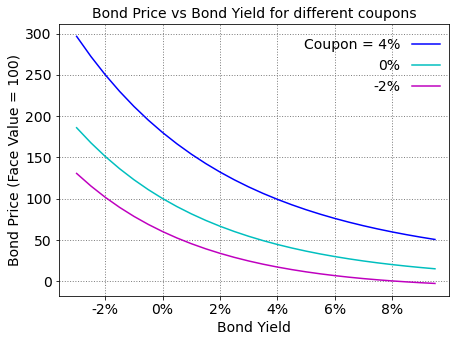

In [13]:
import numpy as np
from matplotlib import pyplot as plt

ALLOWED_YEARLY_FREQUENCIES_OF_COUPON_PAYMENT = [1, 2, 3, 4, 6, 12]
BOND_FACE_VALUE = 100.0
BOND_TIME_LENGTH_IN_YEARS = 20.0  # number of years from the start to the maturity of the bond
COUPON_PAYMENT_FREQUENCY = 2
PLOT_MARKERSIZE = 2


def bond_PV(yearly_coupon_percent=None, coupon_payment_frequency=None, zero_rates=None):
    """
    Generalized bond pricer
    . yearly_coupon_percent: % coupon paid annually
    . coupon_payment_frequency: how many times per year is a coupon paid, at each payment it is coupon % / frequency
    . zero_rates: the list of zero coupon rates on the coupon payment dates

    Note:
    . The first value in zero_rates is the zero coupon rate for the first coupon payment day.
    . The bond matures at  length(zero_rates) / coupon_payment_frequency  year(s) from its start.
    """
    assert coupon_payment_frequency in ALLOWED_YEARLY_FREQUENCIES_OF_COUPON_PAYMENT, \
        f'This coupon payment frequency is not available: {coupon_payment_frequency}'
    assert isinstance(zero_rates, list) and len(zero_rates) and all(isinstance(r, float) for r in zero_rates), \
        '"zero_rates" should be a non-empty list of floats'

    # PV of the notional at maturity
    discount_factor = (1.0 + zero_rates[-1] / coupon_payment_frequency) ** ( - 1.0 - len(zero_rates) )
    bond_pv = BOND_FACE_VALUE * discount_factor

    # adding the PVs of the coupon payments
    coupon = BOND_FACE_VALUE * yearly_coupon_percent / 100.0 / coupon_payment_frequency
    for index_of_coupon_payment_time, zero_rate in enumerate(zero_rates):
        discount_factor = (1.0 + zero_rate / coupon_payment_frequency) ** ( - 1.0 - index_of_coupon_payment_time )
        bond_pv += coupon * discount_factor 

    return bond_pv
        

def plot_bond_price_vs_bond_yield():
    """Plot bond price vs bond yield"""

    # --- settings ---
    bond_yields = np.arange(-0.03, 0.10, 0.005)
    fontsize = 14  # font size for the text of the current plot
    coupons_symbols = [(4.0, 'b-', True), (0.0, 'c-', False), (-2.0, 'm-', False)]
    
    # --- calculating the price as a function of the yield and plotting for several coupon percent values ---
    for coupon_percent, symbol, note in coupons_symbols:    
        bond_prices = []
        for bond_yield in bond_yields:
            coupon_payment_frequency = COUPON_PAYMENT_FREQUENCY
            zero_rates = [bond_yield] * int(BOND_TIME_LENGTH_IN_YEARS * coupon_payment_frequency)
            pv = bond_PV(yearly_coupon_percent=coupon_percent, zero_rates=zero_rates,
                         coupon_payment_frequency=coupon_payment_frequency)
            bond_prices.append(pv)

        # --- plotting ---
        plt.plot(bond_yields, bond_prices, symbol, markersize=PLOT_MARKERSIZE,
                 label=('Coupon = ' if note else '') + f'{coupon_percent:.0f}%')

    plt.grid(color='gray', linestyle=':', linewidth=1)
    plt.title('Bond Price vs Bond Yield for different coupons', fontsize=fontsize)
    plt.xlabel('Bond Yield', fontsize=fontsize)
    plt.ylabel('Bond Price (Face Value = 100)', fontsize=fontsize)
    plt.xlim(right=0.1)
    plt.legend(bbox_to_anchor=(.99, .97), loc=1, borderaxespad=0., fontsize=fontsize, markerfirst=False, frameon=False)
    xtick_values = plt.xticks()[0][1:-1]
    plt.xticks(xtick_values, [str(round(100 * value)) + '%' for value in xtick_values], fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    fig = plt.gcf()
    fig.set_size_inches([7, 5])
    plt.show()


plot_bond_price_vs_bond_yield()

### Bond Duration

<span style="color:red;background-color:yellow;font-weight:bold;">TODO: add the line to the plot</span>

<span style="color:red;background-color:yellow;font-weight:bold;">TODO: explain the line to feel its practical meaning</span>


- **Question**

At what *rate* does the bond price drop when the yield grows by a very small amount ?

In other words, what is the slope of the linear approximation of a bond's price as a function of its yield ?

- **Answer** (leading to the definition)

Recall (from above) that a bond's yield and its price change in the opposite direction, so the line's slope will be negative.

So to obtain the bond's duration, (1) multiply the slope with $\,-1\,$, and then (2) normalize this slope with the bond's current price.

- **Definition**

As a function of a bond's yield, $\,y\,$, and the bond's price, $\,B\left(\,y\,\right)\,$, the `bond's duration` is
$\,\displaystyle{D = - \,\frac{1}{B}\,\frac{\partial\,B\left(\,y\,\right)}{\partial\,y}}\,$.

This definition is also called the `modified duration`.


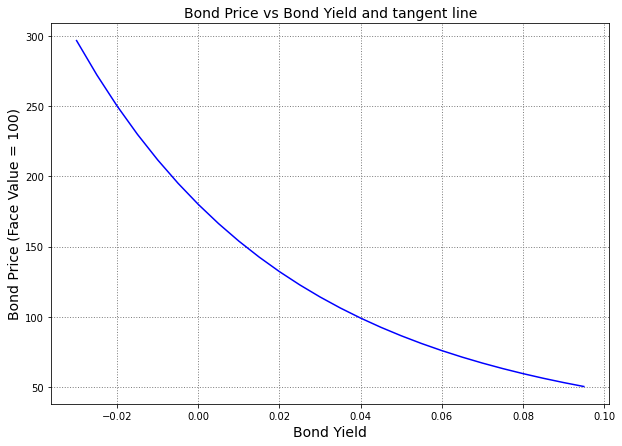

In [15]:
def plot_bond_duration_approximation():
    """
    Plot a single bond price vs yield curve,
    and a tangent line showing the linear approximation at the point of tangency
    """

    # --- settings ---
    bond_yields = np.arange(-0.03, 0.10, 0.005)
    fontsize = 14  # font size for the text of the current plot
    coupon_percent = 4.0
    symbol = 'b-'

    # --- calculating the price as a function of the yield ---
    bond_prices = []
    for bond_yield in bond_yields:
        zero_rates = [bond_yield] * int(BOND_TIME_LENGTH_IN_YEARS * COUPON_PAYMENT_FREQUENCY)
        pv = bond_PV(yearly_coupon_percent=coupon_percent, zero_rates=zero_rates,
                     coupon_payment_frequency=COUPON_PAYMENT_FREQUENCY)
        bond_prices.append(pv)

    # --- plotting ---
    plt.grid(color='gray', linestyle=':', linewidth=1)
    plt.plot(bond_yields, bond_prices, symbol, markersize=PLOT_MARKERSIZE,
             label='Coupon = ' + f'{coupon_percent:.0f}%')
    plt.title('Bond Price vs Bond Yield and tangent line', fontsize=fontsize)
    plt.xlabel('Bond Yield', fontsize=fontsize)
    plt.ylabel('Bond Price (Face Value = 100)', fontsize=fontsize)

    
    fig = plt.gcf()
    fig.set_size_inches([10, 7])
    plt.show()


plot_bond_duration_approximation()

### Macaulay duration

<span style="color:red;background-color:yellow;font-weight:bold;">TODO</span>

(1) Clarify: what is Macaulay duration and what is Modified duration

(2) Connect modified duration with time for payments to reach initially paid price.


### Bond Convexity
<span style="color:red;background-color:yellow;font-weight:bold;">TODO: add bond convexity formula</span>

### Bond pricing with Bootstrapping

<span style="color:red;background-color:yellow;font-weight:bold;">TODO</span>

### Examples

<span style="color:red;background-color:yellow;font-weight:bold;">TODO</span>

**Question**

A half-year bond has a $6\%$ coupon rate.

The current market price of the bond is 96.

What is the simple rate for $T=0.5$ ?

$$96 = \rm{FV} = \frac{103}{1+0.5*L\left(0.5\right)} $$ 

$$ L\left(0.5\right) = 2 \left(\frac{103}{96}-1\right)$$

In [9]:
2*(103/96-1)

0.14583333333333348